<a href="https://colab.research.google.com/github/jalilabdelhamid/Deterministic/blob/main/Deterministic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Define spectrum**


In [2]:
import numpy as np

# x_E in [MeV]
# x_T in [K]
x_T=300.0

def fission_spectrum(x_E):
  return np.exp(-1.036 * x_E) * np.sinh(np.sqrt(2.29 * x_E))

def down_spectrum(x_E):
  return 1/x_E

def thermal_spectrum(x_E,x_T):
  return x_E * np.exp(-x_E/(x_T * 1.380649e-23))



# Define geometry & mat:


*   Fuel: circle (r=1cm) UO2
*   Clad: circle (r=1cm) UO2
*   Moderator: square (a=2cm) H2O






In [3]:
import h5py
f = h5py.File('H1.h5', 'r')

list(f['H1']['reactions']['reaction_002']['294K'].keys())

['xs']

In [19]:
dset_energy = f['H1']['energy']['294K']
dset_micro_xs = f['H1']['reactions']['reaction_002']['294K']['xs']
x = np.zeros(dset_energy.size)
y = np.zeros(dset_energy.size)
for i in range (0,dset_energy.size):
  print(f"enery= {dset_energy[i]}   {dset_micro_xs[i]}")
  x[i]=dset_energy[i] / 1e6
  y[i]=dset_micro_xs[i]


enery= 9.999999999999999e-06   1160.542
enery= 1.03125e-05   1142.828
enery= 1.0625e-05   1125.901
enery= 1.09375e-05   1109.704
enery= 1.125e-05   1094.188
enery= 1.15625e-05   1079.305
enery= 1.1874999999999999e-05   1065.013
enery= 1.21875e-05   1051.274
enery= 1.25e-05   1038.055
enery= 1.28125e-05   1025.321
enery= 1.3125e-05   1013.046
enery= 1.34375e-05   1001.201
enery= 1.3749999999999999e-05   989.7624
enery= 1.4375e-05   968.0146
enery= 1.5e-05   947.6408
enery= 1.5625e-05   928.5022
enery= 1.625e-05   910.4788
enery= 1.6875e-05   893.4663
enery= 1.7500000000000002e-05   877.3737
enery= 1.8125e-05   862.1209
enery= 1.875e-05   847.6374
enery= 1.9375e-05   833.8605
enery= 1.9999999999999998e-05   820.7348
enery= 2.0937499999999997e-05   802.1596
enery= 2.1875e-05   784.7919
enery= 2.28125e-05   768.5063
enery= 2.3749999999999998e-05   753.1949
enery= 2.46875e-05   738.7644
enery= 2.5625e-05   725.1335
enery= 2.65625e-05   712.2308
enery= 2.7499999999999998e-05   699.9938
enery

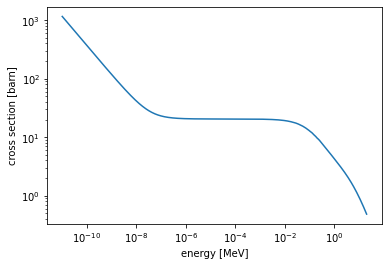

In [20]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('cross section [barn]')
plt.xlabel('energy [MeV]')
plt.yscale('log')
plt.xscale('log')
plt.show()